# PROBLEM 1

Modify the orbit function below to model
one revolution of the moon around the earth,
assuming that the orbit is circular.

Use the math.cos(angle) and math.sin(angle) 
functions in order to accomplish this.

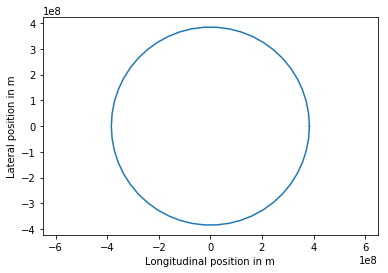

In [25]:
import math
import numpy
from matplotlib import *

moon_distance = 384e6 # m

def orbit():
    num_steps = 50
    x = numpy.zeros([num_steps + 1, 2])
    
    ###Your code here.
    for i in xrange(num_steps + 1):
    	angle = 2.0 * math.pi * i / num_steps
    	x[i, 0] = moon_distance * math.cos(angle)
    	x[i, 1] = moon_distance * math.sin(angle)
    return x

x = orbit()

# @show_plot
def plot_me():
    pyplot.axis('equal')
    pyplot.plot(x[:, 0], x[:, 1])
    axes = pyplot.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
plot_me()



# PROBLEM 2

Modify the trajectory function below to 
plot the trajectory of several particles. 
Each trajectory starts at the point (0,0) 
given initial speed in the direction 
specified by the angle. Use the Forward 
Euler Method to accomplish this.

This is an application of the Forward Euler Method向前欧拉法

(array([[  0.        ,   0.        ],
        [  0.68404029,   1.87938524],
        [  1.36808057,   3.66067048],
        [  2.05212086,   5.34385572],
        [  2.73616115,   6.92894097],
        [  3.42020143,   8.41592621],
        [  4.10424172,   9.80481145],
        [  4.78828201,  11.09559669],
        [  5.47232229,  12.28828193],
        [  6.15636258,  13.38286717],
        [  6.84040287,  14.37935242],
        [  7.52444315,  15.27773766],
        [  8.20848344,  16.0780229 ],
        [  8.89252373,  16.78020814],
        [  9.57656401,  17.38429338],
        [ 10.2606043 ,  17.89027862],
        [ 10.94464459,  18.29816387],
        [ 11.62868487,  18.60794911],
        [ 12.31272516,  18.81963435],
        [ 12.99676545,  18.93321959],
        [ 13.68080573,  18.94870483],
        [ 14.36484602,  18.86609007],
        [ 15.04888631,  18.68537531],
        [ 15.73292659,  18.40656056],
        [ 16.41696688,  18.0296458 ],
        [ 17.10100717,  17.55463104],
        [ 17

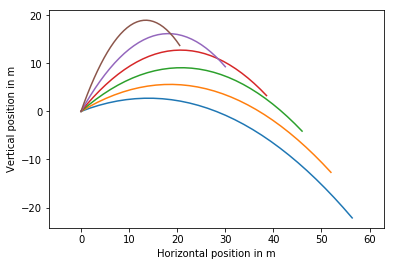

In [33]:
import math
import numpy
from matplotlib import pyplot as plt

h = 0.1 # step size 步长时间: second
g = 9.81 # m / s2
acceleration = numpy.array([0., -g])
initial_speed = 20. # m / s

# @show_plot
def trajectory():
    angles = numpy.linspace(20., 70., 6)
# >>> np.linspace(2.0, 3.0, num=5)
#     array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ])
# >>> np.linspace(2.0, 3.0, num=5, endpoint=False)
#     array([ 2. ,  2.2,  2.4,  2.6,  2.8])
# >>> np.linspace(2.0, 3.0, num=5, retstep=True)
#     (array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ]), 0.25)

    num_steps = 30
    x = numpy.zeros([num_steps + 1, 2])
    v = numpy.zeros([num_steps + 1, 2])

    for angle in angles:
        angle_rad = math.pi / 180. * angle
        x[0,0] = 0.
        x[0,1] = 0
        v[0,0] = initial_speed * math.cos(angle_rad)
        v[0,1] = initial_speed * math.sin(angle_rad)
        for step in range(num_steps):
            x[step + 1] = x[step] + h * v[step]
            v[step + 1] = v[step] + h * acceleration

        plt.plot(x[:, 0], x[:, 1])
        
    plt.axis('equal')
    axes = plt.gca()
    axes.set_xlabel('Horizontal position in m')
    axes.set_ylabel('Vertical position in m')
    return x, v

trajectory()




# PROBLEM 3

Modify the below functions acceleration and 
ship_trajectory to plot the trajectory of a 
spacecraft with the given initial position 
and velocity. Use the Forward Euler Method 
to accomplish this.   

$$
\vec{a_S} = G\frac{m_E}{(d_{ES})^2}\hat{d_{ES}}=G\frac{m_E}{(d_{ES})^3}\vec{d_{ES}}
$$


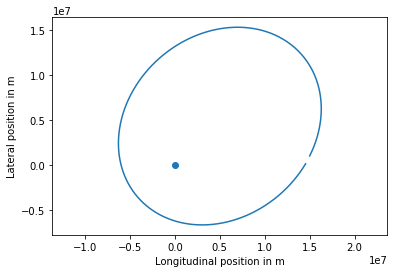

In [44]:
# PROBLEM 3
#
# Modify the below functions acceleration and 
# ship_trajectory to plot the trajectory of a 
# spacecraft with the given initial position 
# and velocity. Use the Forward Euler Method 
# to accomplish this.

import matplotlib

h = 0.1 # s
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position    # earth located at origin
    acc = gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth
    return acc


def ship_trajectory():
    num_steps = 130000
#     num_steps = 130000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s

    x[0, 0] = 15e6
    x[0, 1] = 1e6
    v[0, 0] = 2e3
    v[0, 1] = 4e3

	###Your code here. This code should call the above 
	###acceleration function.
    for step in xrange(num_steps):
        x[step + 1] = x[step] + h * v[step]
        v[step + 1] = v[step] + h * acceleration(x[step])

    return x, v

x, v = ship_trajectory()

# @show_plot
def plot_me():
    matplotlib.pyplot.plot(x[:, 0], x[:, 1])
    matplotlib.pyplot.scatter(0, 0)
    matplotlib.pyplot.axis('equal')
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
plot_me()
    


